# Appliance Energy prediction

Appliances energy consumption will paly a major role in understanding electrical energy demand. 
Appliances, such as televisions and consumer electronics operating in standby were attributed to a 10.2% increase in the electricity consumption. 
Thus, prediction models of electrical energy consumption in buildings can be use-ful for a number of applications: 
     To determine adequate sizing of photovoltaics and energy storage to diminish power flow into the grid
     To detect abnormal energy use patterns 
     To be part of an energy management system for load control


In [30]:
#Loading Libraries
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression,TheilSenRegressor

from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error, median_absolute_error, r2_score

In [31]:

from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [32]:
#Loading dataset
df=pd.read_csv("energydata_complete.csv")

In [33]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [34]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [35]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [36]:
#Building Regression models
from sklearn.model_selection import train_test_split

In [37]:
y=df["Appliances"]

In [38]:
X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
X_test.shape

(4934, 27)

In [42]:
lm=LinearRegression()

In [43]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
Coeffiecient=lm.coef_

In [45]:
print(Coeffiecient)

[  2.10479733  -0.46626347  14.61618426 -16.61145842 -12.85171277
  24.1394585    4.68018159  -4.37044602  -0.06285119  -0.80260292
   0.23703713   7.06106895   0.28364171   1.97657274  -1.62337008
   8.16831723  -4.66678406 -14.30530192  -0.80937378 -10.28281641
   0.16659669  -1.09713003   1.65345898   0.2054929    5.12842913
  -0.03328512  -0.03328512]


In [46]:
predictions = lm.predict( X_test)

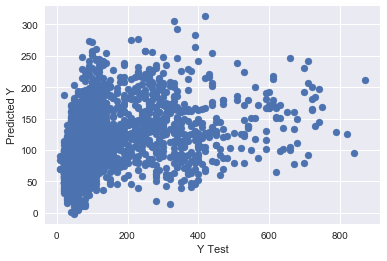

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 53.5455982386
MSE: 8738.47187395
RMSE: 93.479793934


In [49]:
#Feature Engineering
df['date']=pd.to_datetime(df['date'])


In [50]:
df['day_of_week'] = df['date'].dt.weekday_name
df['seconds'] = df['date'].dt.hour*3600 + df['date'].dt.minute*60 + df['date'].dt.second

In [51]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,seconds
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,63600


In [52]:
df['week_status']=df['day_of_week']

In [53]:
week_mapping = {"Monday": "Weekday", "Tuesday": "Weekday", "Wednesday": "Weekday", "Thursday": "Weekday", "Friday": "Weekday","Saturday": "Weekend", "Sunday": "Weekend"}
for dataset in [df]:
    dataset['week_status'] = dataset['week_status'].map(week_mapping)

In [54]:
dow = pd.get_dummies(df['day_of_week'],drop_first=True,prefix='dow')

ws=pd.get_dummies(df['week_status'],drop_first=True,prefix='ws')


In [55]:
df.drop(['day_of_week','week_status'],axis=1,inplace=True)

df = pd.concat([df,dow,ws],axis=1)


In [56]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,seconds,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,ws_Weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,61200,1,0,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,61800,1,0,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,62400,1,0,0,0,0,0,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,63000,1,0,0,0,0,0,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,63600,1,0,0,0,0,0,0


In [57]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend'],
      dtype='object')

R2 score: 0.172921


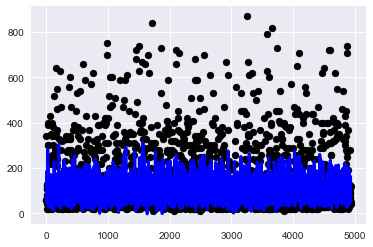

In [58]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.5448016311
MSE: 8738.691613
RMSE: 93.4809692558


In [60]:
#Applying Randomforest regessor
from sklearn.ensemble import RandomForestRegressor

In [61]:

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
regressor.score(X_test, y_test)

0.45960057504211238

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36.2413862991
MSE: 5709.71402513
RMSE: 75.5626496699


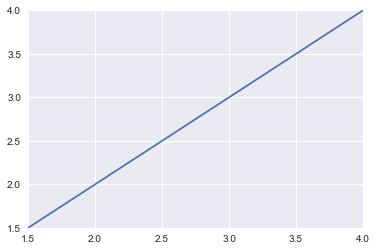

In [65]:
plt.scatter(x=y_test, y=y_pred)
plt.xlim([1.5,4])
plt.ylim([1.5,4])
plt.plot([1.5,4],[1.5,4])
plt.show()

In [66]:
#Interpretng Model results
feature_import = pd.DataFrame(data=regressor.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,RH_1,RH_out,RH_8,RH_3,Press_mm_hg,lights,T3,RH_2,RH_5,RH_6,...,Windspeed,T9,T1,T6,Tdewpoint,T7,Visibility,T_out,rv1,rv2
values,0.062227,0.059898,0.054355,0.054028,0.049632,0.048501,0.044633,0.042957,0.042161,0.041477,...,0.030377,0.030358,0.030317,0.027408,0.02708,0.024206,0.023425,0.023362,0.017995,0.017513


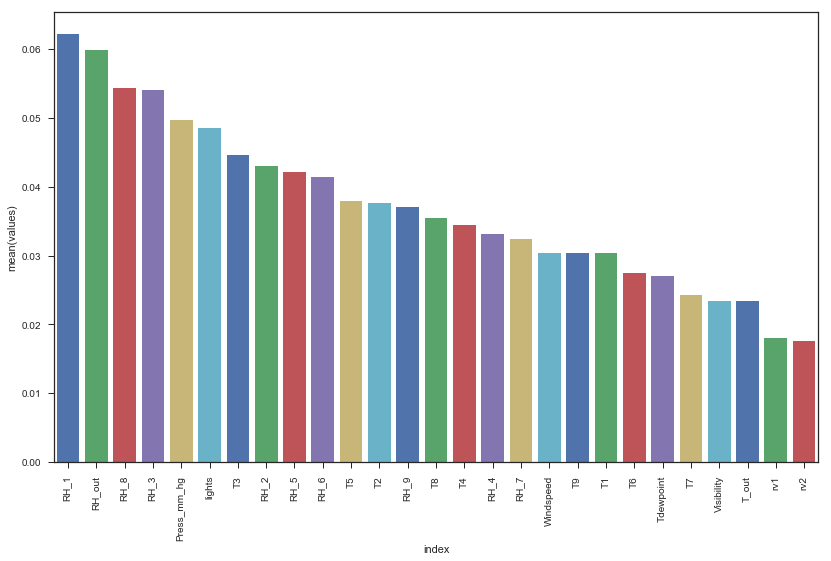

In [67]:
#Feature Importance
feature_import.reset_index(level=0, inplace=True)
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(13.7, 8.27)
sns.barplot(x='index', y='values', data=feature_import, palette='deep',saturation=.9)


rotation = 90
for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


plt.show()



In [39]:
#Finding Hyper Parameters using gridsearch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}


In [40]:
model = RandomForestRegressor(random_state=0)

In [41]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 500], 'max_depth': [3, None], 'max_features': [1, 3, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.498940498054
{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [43]:
results = grid.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'],results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.0441 0.0023
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500} 0.0459 0.0028
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 0.0445 0.0025
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500} 0.0463 0.003
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200} 0.0444 0.0026
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500} 0.0463 0.0031
{'bootstrap': True, 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200} 0.0444 0.0025
{'bootstrap': True, 'max_depth': 3, 'max

In [54]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend'],
      dtype='object')

In [68]:
X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'seconds', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'ws_Weekend']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [70]:
regressor = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [71]:
regressor.score(X_test, y_test)

0.6158559823762616

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36.2413862991
MSE: 5709.71402513
RMSE: 75.5626496699


In [73]:

#######  Feature scaling#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
scaled_test = scaler.transform(X_test)


scaler.fit(X_train)
scaled_train = scaler.transform(X_train)




In [74]:
regressor = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(scaled_train, y_train)

MemoryError: could not allocate 1572864 bytes

In [75]:
regressor.score(scaled_test, y_test)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [76]:
###  Feature Selection  ##

# Recursive Feature Elimination

from sklearn.feature_selection import RFE


model = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
# create the RFE model and select 4 attributes
rfe = RFE(model, None)
rfe = rfe.fit(X_train,y_train )
# summarize the selection of the attributes
fs_s=rfe.support_
fs_r=rfe.ranking_


MemoryError: 

In [77]:
fs_r

NameError: name 'fs_r' is not defined

In [78]:
fr = pd.DataFrame(X.columns,fs_r)

NameError: name 'fs_r' is not defined

In [79]:
fr

NameError: name 'fr' is not defined

In [80]:
#Interpretng Model results
feature_import = pd.DataFrame(data=regressor.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

ZeroDivisionError: division by zero

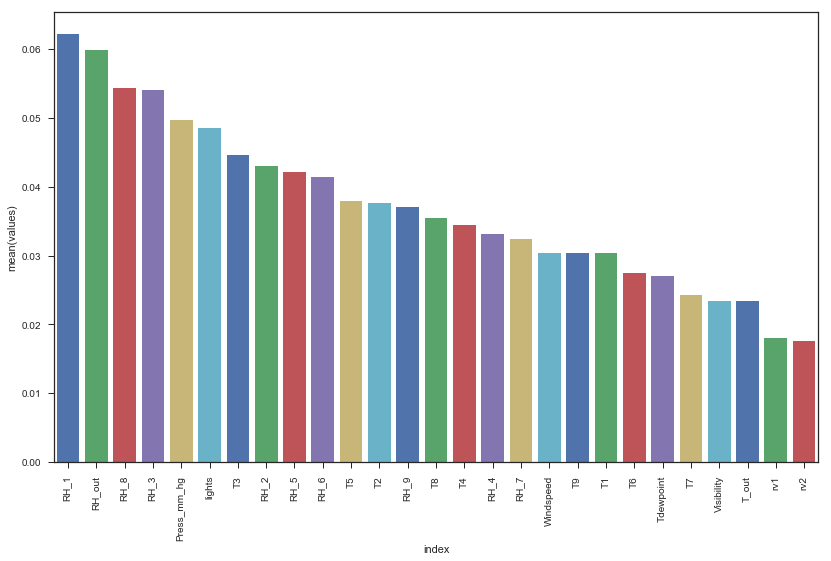

In [81]:
#Feature Importance
feature_import.reset_index(level=0, inplace=True)
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(13.7, 8.27)
sns.barplot(x='index', y='values', data=feature_import, palette='deep',saturation=.9)


rotation = 90
for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


plt.show()


In [82]:
X=df[[ 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8',  'RH_9','T9', 'T_out', 'Press_mm_hg', 'Windspeed','RH_out', 
       'Tdewpoint', 'seconds']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [84]:
X_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,RH_9,T9,T_out,Press_mm_hg,Windspeed,RH_out,Tdewpoint,seconds
17803,24.50,36.590000,22.540000,37.620000,24.100,31.976000,24.751429,36.264286,23.790000,41.99250,...,25.29,38.497143,40.741429,23.89,8.666667,755.550000,5.833333,63.333333,2.016667,29400
6060,21.26,45.323333,19.856667,45.290000,21.525,42.425000,20.166667,43.663333,18.500000,52.13125,...,20.89,47.656667,45.090000,18.60,5.500000,752.700000,3.000000,98.000000,5.200000,68400
7567,20.89,36.564286,18.890000,38.090000,21.000,38.668571,19.390000,35.912500,18.200000,51.61750,...,21.00,44.500000,41.500000,18.50,3.721429,740.754762,7.857143,91.047619,2.330952,22200
14224,21.50,39.590000,22.500000,36.966667,22.000,37.200000,22.000000,37.134000,19.890000,46.29000,...,21.39,40.400000,39.290000,20.29,11.433333,765.533333,1.000000,68.666667,5.733333,42000
7121,20.79,35.700000,18.290000,37.000000,21.000,35.700000,20.260000,33.966667,18.566667,40.09000,...,21.60,41.730000,38.730000,18.29,-2.950000,762.583333,2.000000,96.000000,-3.466667,13800


In [85]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [86]:
regressor.score(X_test, y_test)

0.64518777503736424

In [87]:
y_pred = regressor.predict(X_test)

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 26.9784758816
MSE: 3748.84991285
RMSE: 61.2278524272


In [89]:
###### PCA  ####
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(scaled_train)

x_pca = pca.transform(scaled_train)

scaled_train.shape

x_pca.shape

t_pca=pca.transform(scaled_test)

In [90]:
print(pca.explained_variance_ratio_)

[  2.67511444e-01   2.02103148e-01   6.33054860e-02   5.83288226e-02
   5.56610066e-02   3.88044237e-02   3.54762436e-02   3.37633798e-02
   3.33933739e-02   3.31157537e-02   2.80039224e-02   2.75959113e-02
   2.37509505e-02   1.95600217e-02   1.52582251e-02   1.37563892e-02
   1.07572470e-02   5.74558205e-03   5.36453757e-03   4.26332589e-03
   3.97010756e-03   3.58031911e-03   3.12500915e-03   3.06913635e-03
   2.55247060e-03   1.99732987e-03   1.82497188e-03   1.26749030e-03
   1.15794148e-03   7.75774273e-04   6.36333325e-04   4.16214916e-04
   1.07707023e-04   5.27573299e-32   1.40739683e-33]


In [91]:
print(pca.singular_values_)

[  3.72263738e+02   3.23568392e+02   1.81092400e+02   1.73828570e+02
   1.69806801e+02   1.41781697e+02   1.35565246e+02   1.32252079e+02
   1.31525421e+02   1.30977553e+02   1.20445058e+02   1.19564409e+02
   1.10922602e+02   1.00661690e+02   8.89061001e+01   8.44173625e+01
   7.46500532e+01   5.45565083e+01   5.27163942e+01   4.69952341e+01
   4.53503547e+01   4.30665835e+01   4.02351105e+01   3.98738015e+01
   3.63630184e+01   3.21665475e+01   3.07473464e+01   2.56242919e+01
   2.44919214e+01   2.00469006e+01   1.81560715e+01   1.46837970e+01
   7.46967252e+00   1.65318309e-13   2.70014966e-14]


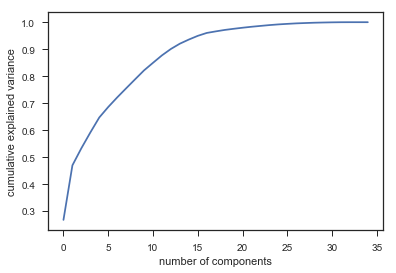

In [92]:
pca = PCA().fit(scaled_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [93]:
###### PCA  ####
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_train)

x_pca = pca.transform(scaled_train)

scaled_train.shape

x_pca.shape

t_pca=pca.transform(scaled_test)

In [94]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)
regressor.fit(x_pca, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [95]:
regressor.score(t_pca, y_test)

0.25176243470095416

In [96]:
y_pred = regressor.predict(t_pca)

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 47.6553708958
MSE: 7905.67554925
RMSE: 88.9138658998


R2 score: 0.164058


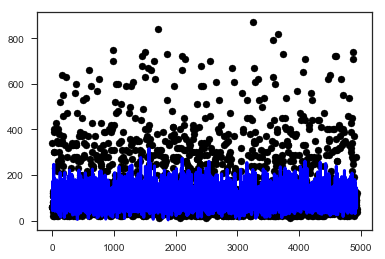

In [98]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.9097628775
MSE: 8832.33375167
RMSE: 93.9804966558


R2 score: 0.164058


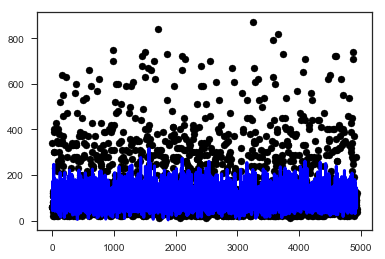

In [100]:
#Ridge regression
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
y_pred = cv.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
#print ('Features: %s'%str(features))
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print ('Intercept: %f'%regr.intercept_)
#print ('Coefficients: %s'%str(regr.coef_))

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 53.9097628775
MSE: 8832.33375167
RMSE: 93.9804966558


R2 score: 0.409203


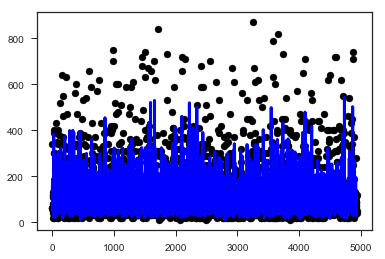

In [102]:
#GradientBoostingRegresson
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=500)
y_pred = model.fit(X_train, y_train).predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue',linewidth=3)
#print 'Features: %s'%str(features)
print ('R2 score: %f'%r2_score(y_test, y_pred))
#print 'Intercept: %f'%regr.intercept_
#print 'Coefficients: %s'%str(regr.coef_)

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 41.6519895185
MSE: 6242.20362279
RMSE: 79.0076174985


# Forecasting 

In [230]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import explained_variance_score

In [231]:
#Datapreparation
#Aggregate daywise consumption
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,seconds,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,ws_Weekend,day
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,61200,1,0,0,0,0,0,0,2016-01-11
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,61800,1,0,0,0,0,0,0,2016-01-11
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,62400,1,0,0,0,0,0,0,2016-01-11
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,63000,1,0,0,0,0,0,0,2016-01-11
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,63600,1,0,0,0,0,0,0,2016-01-11


In [232]:
df['day']=df['date'].dt.date

In [233]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,seconds,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,ws_Weekend,day
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,61200,1,0,0,0,0,0,0,2016-01-11
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,61800,1,0,0,0,0,0,0,2016-01-11
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,62400,1,0,0,0,0,0,0,2016-01-11
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,63000,1,0,0,0,0,0,0,2016-01-11
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,63600,1,0,0,0,0,0,0,2016-01-11


In [277]:
data=df.groupby('day',as_index=False)[['Appliances']].sum()

In [278]:
data.head()

,day,Appliances
0,2016-01-11,5740
1,2016-01-12,12340
2,2016-01-13,13970
3,2016-01-14,21800
4,2016-01-15,18050


In [279]:
data['day']=pd.to_datetime(data.day)



In [280]:
data['Months']=data['day'].dt.month


In [281]:
data['Year']=data['day'].dt.year

In [282]:
data.head()

,day,Appliances,Months,Year
0,2016-01-11,5740,1,2016
1,2016-01-12,12340,1,2016
2,2016-01-13,13970,1,2016
3,2016-01-14,21800,1,2016
4,2016-01-15,18050,1,2016


In [283]:
data=data.set_index('day')

In [284]:
data["Appliances"]=pd.to_numeric(data["Appliances"], downcast='float')

In [289]:
date_thresh = datetime.strptime('2016-04-15',"%Y-%m-%d").date()

In [290]:
data_train = data[:date_thresh]
data_test = data[date_thresh:]

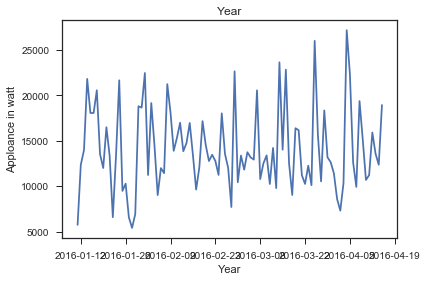

In [291]:
plt.plot(data_train.index, data_train["Appliances"])
plt.xlabel('Year')
plt.ylabel('Apploance in watt')
plt.title('Year')

In [292]:
#Stationary test using Dicker-Fuller Test Statistics
def evaluate_stationarity(timeseries, t=30):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=t).mean()
    rolstd = timeseries.rolling(window=t).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

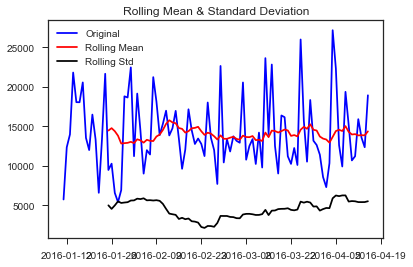

Results of Dickey-Fuller Test:
Test Statistic                -8.934505e+00
p-value                        9.615235e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [293]:
evaluate_stationarity(data_train['Appliances'], 15)

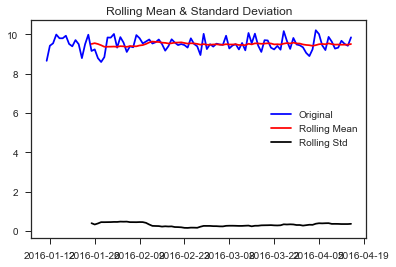

Results of Dickey-Fuller Test:
Test Statistic                -8.457554e+00
p-value                        1.599588e-13
#Lags Used                     0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [294]:
#after log transformation
data_log = np.log(data_train['Appliances'])
evaluate_stationarity(data_log, 15)

In [295]:
data_log = np.log(data_train['Appliances'])
#Determing rolling statistics
rolmean = data_log.rolling(window=15).mean()
rolstd = data_log.rolling(window=15).std()

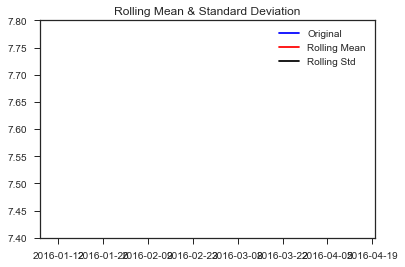

In [296]:
#Plot rolling statistics:
orig = plt.plot(data_log, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.ylim([7.4,7.8])
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


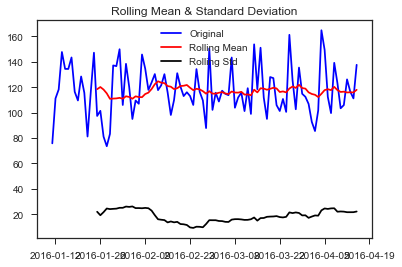

Results of Dickey-Fuller Test:
Test Statistic                -8.707108e+00
p-value                        3.674828e-14
#Lags Used                     0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [297]:
data_sqrt = np.sqrt(data_train['Appliances'])
evaluate_stationarity(data_sqrt, 15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  if __name__ == '__main__':


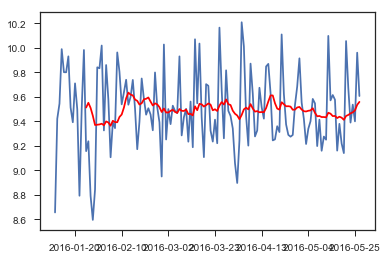

In [205]:
moving_avg = pd.rolling_mean(data_log,15)
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [206]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(15)

day
2016-01-11         NaN
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-16         NaN
2016-01-17         NaN
2016-01-18         NaN
2016-01-19         NaN
2016-01-20         NaN
2016-01-21         NaN
2016-01-22         NaN
2016-01-23         NaN
2016-01-24         NaN
2016-01-25   -0.356644
Name: Appliances, dtype: float64

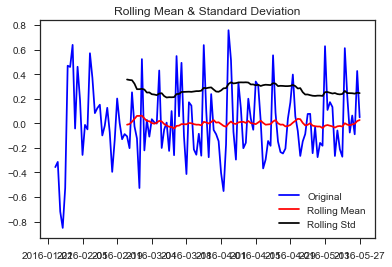

Results of Dickey-Fuller Test:
Test Statistic                -7.620454e+00
p-value                        2.135376e-11
#Lags Used                     2.000000e+00
Number of Observations Used    1.210000e+02
Critical Value (1%)           -3.485585e+00
Critical Value (5%)           -2.885739e+00
Critical Value (10%)          -2.579676e+00
dtype: float64


In [207]:
data_log_moving_avg_diff.dropna(inplace=True)
evaluate_stationarity(data_log_moving_avg_diff)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=15,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


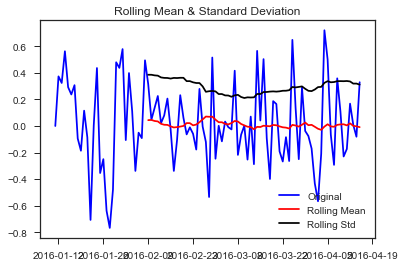

Results of Dickey-Fuller Test:
Test Statistic                -7.984140e+00
p-value                        2.575930e-12
#Lags Used                     0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [298]:
expwighted_avg = pd.ewma(data_log, halflife=15)
data_log_ewma_diff = data_log - expwighted_avg
evaluate_stationarity(data_log_ewma_diff)

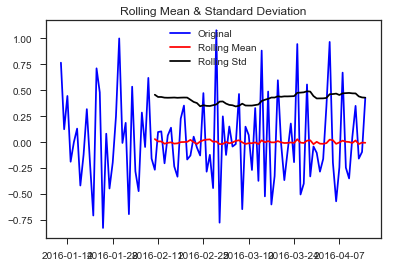

Results of Dickey-Fuller Test:
Test Statistic                -6.162066e+00
p-value                        7.134319e-08
#Lags Used                     8.000000e+00
Number of Observations Used    8.600000e+01
Critical Value (1%)           -3.508783e+00
Critical Value (5%)           -2.895784e+00
Critical Value (10%)          -2.585038e+00
dtype: float64


In [299]:
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace=True)
evaluate_stationarity(data_log_diff)

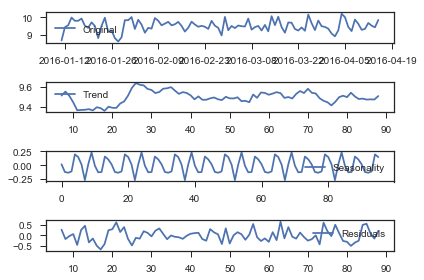

In [304]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(data_log), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

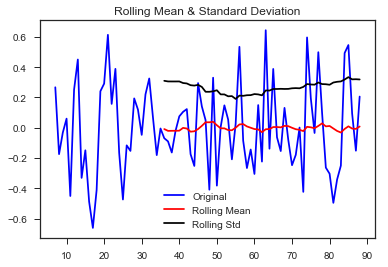

Results of Dickey-Fuller Test:
Test Statistic                 -5.013700
p-value                         0.000021
#Lags Used                      7.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


In [305]:
data_log_decompose = pd.Series(residual)
data_log_decompose.dropna(inplace=True)
evaluate_stationarity(data_log_decompose)

In [306]:
sm.stats.durbin_watson(data_log_diff)

2.613435

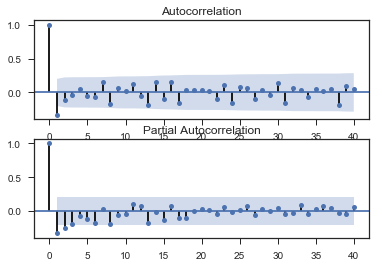

In [307]:
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(data_log_diff.squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_log_diff, lags=40, ax=ax2)

In [337]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [338]:
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

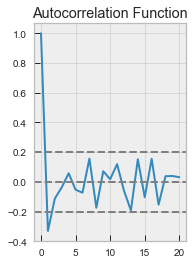

In [340]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

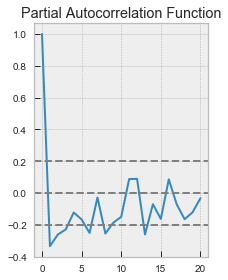

In [341]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

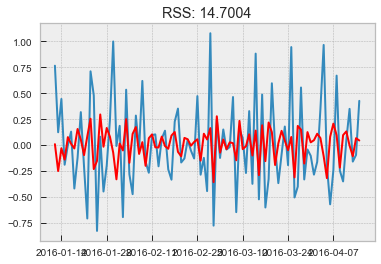

In [343]:
model = ARIMA(data_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2))

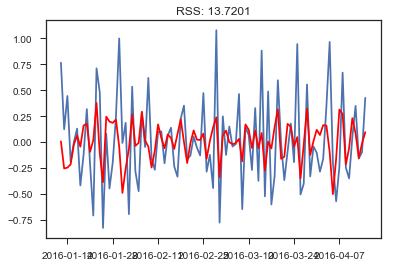

In [309]:
#Auto Regression
model = ARIMA(data_log, order=(1, 1, 0), dates=data_log.index.to_datetime())
results_AR_210 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_AR_210.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_210.fittedvalues-data_log_diff)**2))

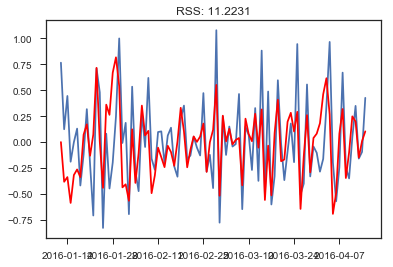

In [310]:
#Moving Average
model = ARIMA(data_log, order=(0, 1, 1), dates=data_log.index.to_datetime())
results_MA_011 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_MA_011.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA_011.fittedvalues-data_log_diff)**2))

In [336]:
print(results_MA_011.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Appliances   No. Observations:                   95
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -31.563
Method:                       css-mle   S.D. of innovations              0.329
Date:                Fri, 08 Jun 2018   AIC                             69.127
Time:                        07:31:57   BIC                             76.788
Sample:                    01-12-2016   HQIC                            72.222
                         - 04-15-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0006      0.001      0.468      0.641      -0.002       0.003
ma.L1.D.Appliances    -0.9999      0.028    -35.344      0.000      -1.055      -0.944
                    

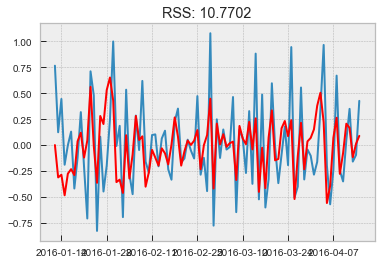

In [344]:
#Arima model
model = ARIMA(data_log, order=(1, 1, 1), dates=data_log.index.to_datetime())
results_ARIMA_111 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA_111.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA_111.fittedvalues-data_log_diff)**2))

In [331]:
print(results_ARIMA_111.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Appliances   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -30.044
Method:                       css-mle   S.D. of innovations              0.325
Date:                Fri, 08 Jun 2018   AIC                             68.087
Time:                        07:04:52   BIC                             78.303
Sample:                    01-12-2016   HQIC                            72.215
                         - 04-15-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0007      0.001      0.504      0.616      -0.002       0.004
ar.L1.D.Appliances     0.1852      0.106      1.753      0.083      -0.022       0.392
ma.L1.D.Appliances  

In [312]:
predictions_ARIMA_diff = pd.Series(results_ARIMA_111.fittedvalues,copy=True)
print (predictions_ARIMA_diff.head())

day
2016-01-12    0.000737
2016-01-13   -0.310789
2016-01-14   -0.285401
2016-01-15   -0.483426
2016-01-16   -0.274996
dtype: float64


In [313]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

day
2016-01-12    0.000737
2016-01-13   -0.310052
2016-01-14   -0.595453
2016-01-15   -1.078878
2016-01-16   -1.353874
dtype: float64


In [321]:
print (results_ARIMA_111.aic)

68.08721837079892


In [315]:
predictions_ARIMA_log = pd.Series(data_log.ix[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


day
2016-01-11    8.655214
2016-01-12    8.655951
2016-01-13    8.345162
2016-01-14    8.059761
2016-01-15    7.576336
dtype: float64

In [316]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [317]:
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or    percent error = * 100

In [318]:
def rmse(y, yhat):
    return np.sqrt(sum((yhat-y)**2)/len(y))

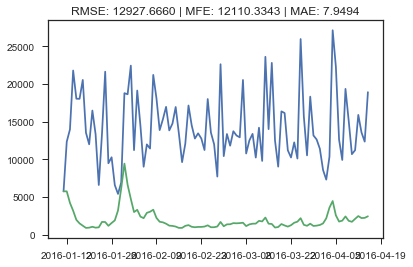

In [322]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_train['Appliances'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f | MFE: %.4f | MAE: %.4f'% (rmse(data_train['Appliances'], predictions_ARIMA), mean_forecast_err(data_train['Appliances'], predictions_ARIMA), mean_absolute_err(data_train['Appliances'], predictions_ARIMA)))

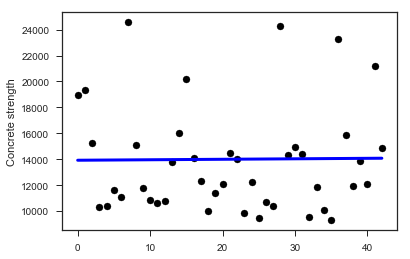

In [324]:
regr = LinearRegression()
x=0
x_train = [[x] for x in range(len(data_train))]
y_train = [[y] for y in list(data_train['Appliances'])]
x_test = [[z] for z in range(x+1, x + 1+len(data_test))]
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
explained_variance_score(data_test['Appliances'], y_pred)
plt.scatter(range(len(data_test)), data_test['Appliances'], color='black')
plt.plot(range(len(data_test)), y_pred, color='blue',linewidth=3)
plt.ylabel('Concrete strength')